In [1]:
# how to convert image to the dataset

In [2]:
# read raw image as a numpy array

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.image as mi

In [5]:
# now import the raw image
oimage=mi.imread("/home/ramchowdary/Pictures/Wallpapers/1.jpeg")

(1090, 1080, 3)


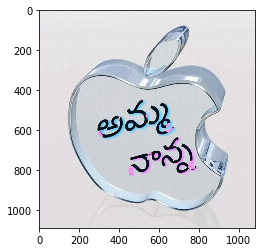

In [6]:
# for look that image and shape of that image
print(oimage.shape)
plt.imshow(oimage)
plt.show()

In [7]:
# 1090*1080*3

In [8]:
newimage= np.reshape(oimage,(1080,-1))

In [9]:
newimage

array([[234, 232, 233, ..., 236, 234, 235],
       [234, 232, 233, ..., 233, 231, 232],
       [238, 236, 237, ..., 236, 234, 235],
       ...,
       [226, 221, 225, ..., 226, 221, 225],
       [226, 221, 225, ..., 222, 222, 222],
       [222, 222, 222, ..., 224, 224, 224]], dtype=uint8)

In [10]:
print(newimage.mean())
print(newimage.std())

210.59033016196625
37.52301305333735


In [11]:
# standardization
from sklearn.preprocessing import StandardScaler as ss
stds=ss()
x= newimage
x.shape

(1080, 3270)

In [12]:
#standardize the new image data
standardizedimage = stds.fit(x)

In [13]:
type(standardizedimage)

sklearn.preprocessing._data.StandardScaler

In [14]:
# convert into array format
strd_i= standardizedimage.transform(x)


In [15]:
strdI = stds.fit_transform(x)
type(strdI)

numpy.ndarray

In [16]:
print(strdI)
print(strdI.shape)

[[0.674079   0.65229431 0.54541009 ... 0.69128313 0.6689876  0.56032616]
 [0.674079   0.65229431 0.54541009 ... 0.6161613  0.58416976 0.46896403]
 [0.77422418 0.76581906 0.66828095 ... 0.69128313 0.6689876  0.56032616]
 ...
 [0.47378866 0.34010124 0.29966837 ... 0.44087703 0.30144364 0.25578575]
 [0.47378866 0.34010124 0.29966837 ... 0.34071459 0.32971625 0.16442362]
 [0.37364349 0.36848243 0.20751523 ... 0.39079581 0.38626148 0.22533171]]
(1080, 3270)


# COVARIANCE

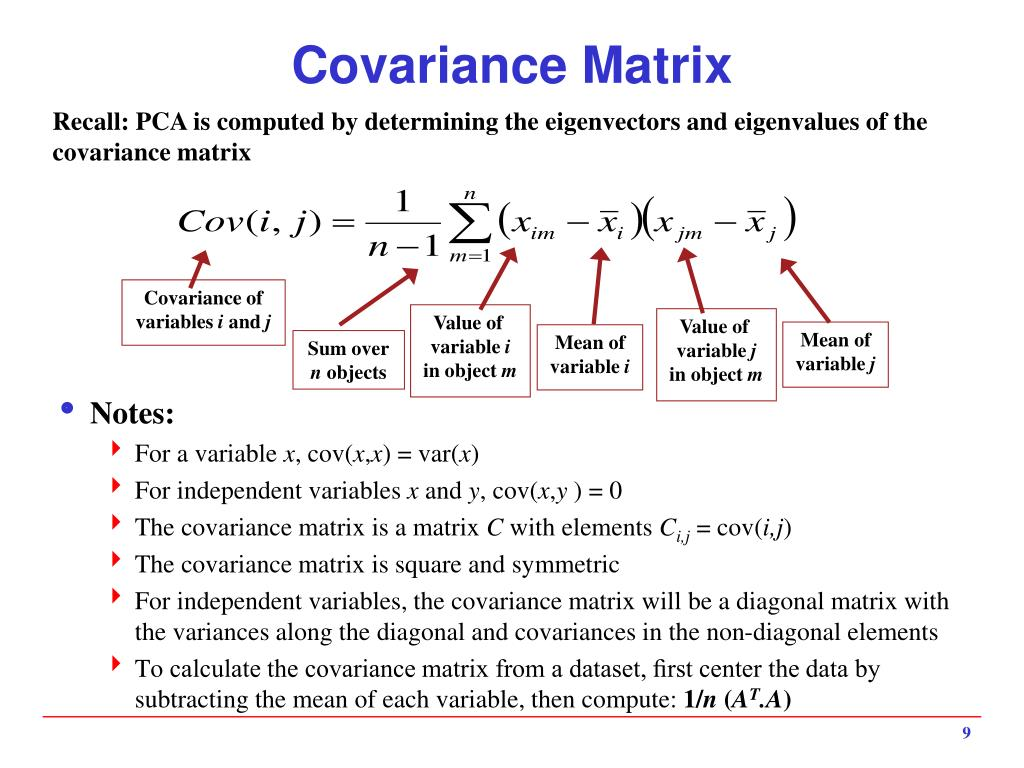

In [17]:
from IPython.display import Image as im
#im(data="/home/ramchowdary/Desktop/revised ai/A-Covariance-matrix-for-three-traits-A-B-and-C-The-diagonal-elements-are-the.png")
im(data="/home/ramchowdary/Desktop/revised ai/covariance-matrix-l.jpg",width=800,height=200)

In [18]:
# cov = x.T*x 
covar_image = np.matmul(strdI.T,strdI)
covar_image.shape
# it is in the matrix format

(3270, 3270)

# EIGHEN VECTORS AND VALUES

In [19]:
# find the eigen values and eigen vectors
# eigen values and vectors gives the direction of variance 
#The eigenvalues of a symmetric matrix are always real and the eigenvectors are always orthogonal! Let's verify these facts with some random matrices:
# these are used to turn the points into towards the direction of varia

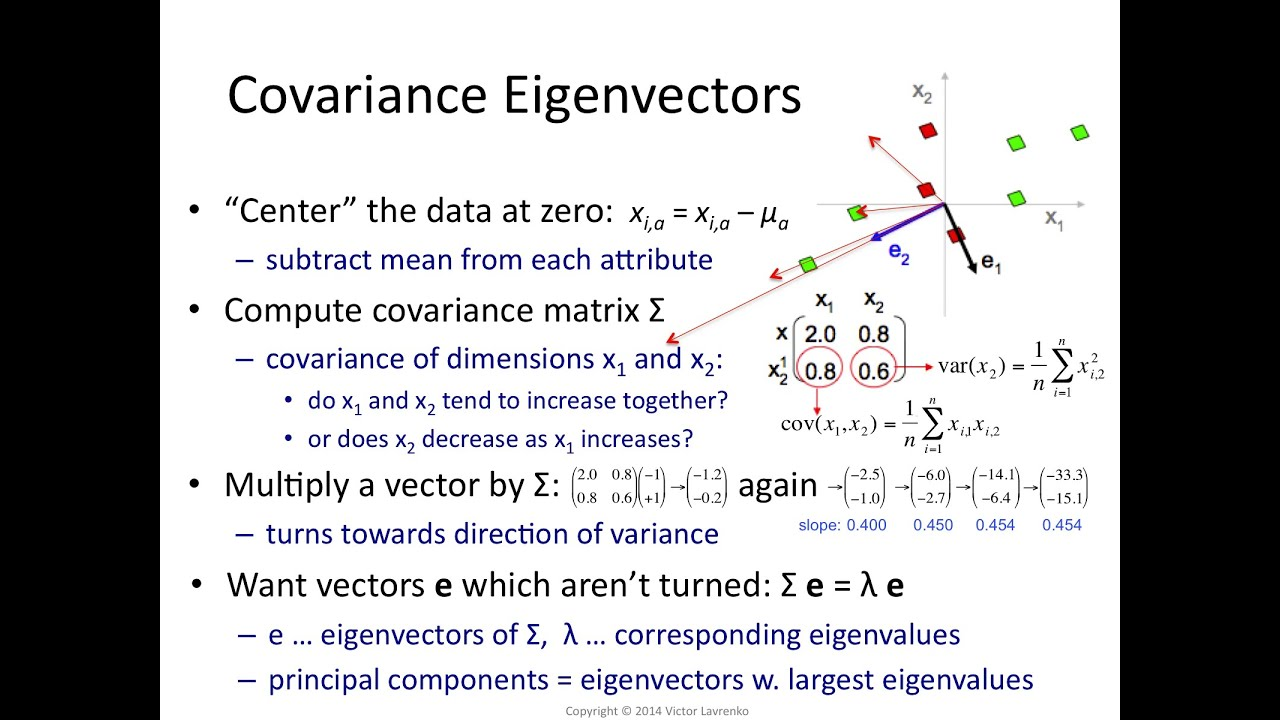

In [20]:
# for why eigen vectors and eigen values
im(data="/home/ramchowdary/Desktop/revised ai/why eigen.jpg",width=1000,height=300)

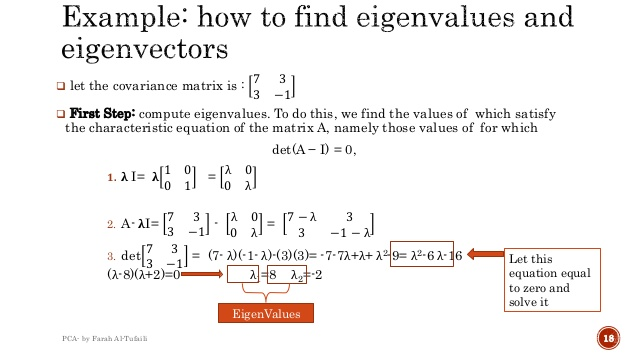

In [21]:
# in pca we can perform the eigen decomposition.
# we can perform the eigen decomposition on caovariance matrix.

im(data="/home/ramchowdary/Desktop/revised ai/eigenvalues.jpg",width=700,height=50)

In [22]:
# ex:

In [23]:
from scipy.linalg import eigh,eig,eigvalsh
import scipy.linalg as la

In [24]:
values,vectors = la.eig(covar_image)

In [25]:
eigen_values = values
print(values.shape)
eigen_vectors= vectors
print(vectors.shape)
# no of eighen values and eighen vectors are same no 

(3270,)
(3270, 3270)


In [26]:
# i am creating eighen pair lists
import numpy as np
from numpy import linalg as npla
#
def eigen(A):
    eigenValues, eigenVectors = npla.eigh(A)
    idx = np.argsort(eigenValues)[::-1] # this is used to sort the index values.
    eigenValues = eigenValues[idx] # obtain that idx value
    eigenVectors = eigenVectors[:,idx]#its corresponding vector
    return (eigenValues, eigenVectors)
r=eigen(covar_image)
# at above after argsort reversing that using sliving

In [27]:
vals=r[0]
vals.shape
vecs=r[1]
vecs.shape
# from the above function

(3270, 3270)

In [28]:
# check all the eighen values are in descending order.
eigen_values[200]>eigen_values[900]
#vals[780]>vals[700]

True

In [29]:
# creating the list of the eigen value,vector tuples.
principles=[]
for i in range(len(eigen_values)):
    t1 = (np.abs(eigen_values[i],eigen_vectors[:,i]))
    principles.append(t1)
print("the leangth of the principles or axes:",len(principles))

the leangth of the principles or axes: 3270


In [30]:
# take some principal components 
# by performing slicing
k = principles[:600] # from the principles list iam taking 600 priciples

# new eighen values & vectors

In [31]:
new_eigh_vals = r[0][:3270] # extending 600 to 1080.
new_eigh_vecs = r[1][:3270]
new_eigh_vecs.shape

(3270, 3270)

In [38]:
eigen_image = np.matmul(new_eigh_vecs,strdI .T)

In [39]:
nimage=np.reshape(eigen_image,(1090,1080*3))

In [44]:
#plt.imshow(eigen_image)
#plt.show()

In [46]:
# the array has 1090 rows each of pixel 1080*3
#reshape this original image into pca understanding format

In [42]:
nimage=np.reshape(oimage,(1090,1080*3))

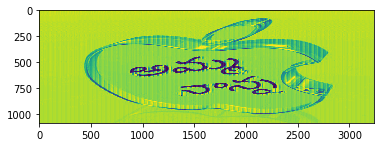

In [43]:
plt.imshow(nimage)
plt.show()

In [76]:
# now lets run randomized pca
